# 확률 분포 모형

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp

import scipy.stats

#시각화 패키지
import matplotlib.pyplot as plt

#시각화에서 한글을 사용하기 위한 설정
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    
#시각화에서 음수를 표현하기 위한 설정
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False 

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한 
%precision 3
# DataFrame의 출력을 소수점 이하 3자리로 제한 
pd.set_option('precision', 3)

## scipy

### 정규 분포 객체 생성

In [2]:
rv = sp.stats.norm()

### 모수 지정

In [3]:
rv = sp.stats.norm(loc=1, scale=2)

### 확률 밀도 함수

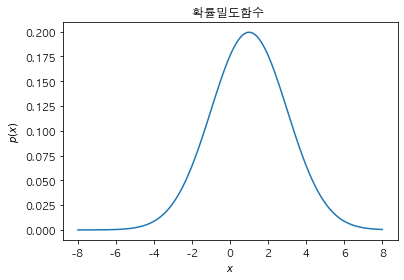

In [4]:
xx = np.linspace(-8, 8, 100)
pdf = rv.pdf(xx)
plt.plot(xx, pdf)
plt.title("확률밀도함수 ")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

### 누적 분포 함수

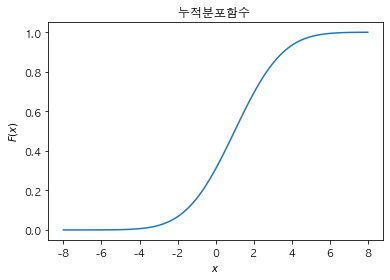

In [5]:
xx = np.linspace(-8, 8, 100)
cdf = rv.cdf(xx)
plt.plot(xx, cdf)
plt.title("누적분포함수 ")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.show()

### 무작위 표본 생성

In [6]:
rv.rvs(size=(3, 5), random_state=0)

array([[ 4.528,  1.8  ,  2.957,  5.482,  4.735],
       [-0.955,  2.9  ,  0.697,  0.794,  1.821],
       [ 1.288,  3.909,  2.522,  1.243,  1.888]])

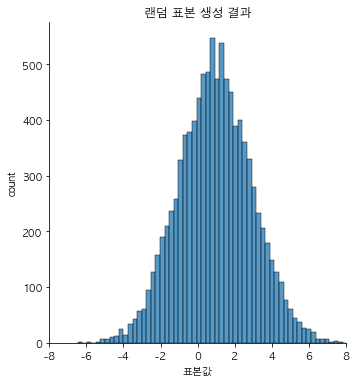

In [10]:
sns.displot(rv.rvs(size=10000, random_state=0))
plt.title("랜덤 표본 생성 결과")
plt.xlabel("표본값")
plt.ylabel("count")
plt.xlim(-8, 8)
plt.show()

### 시뮬레이션

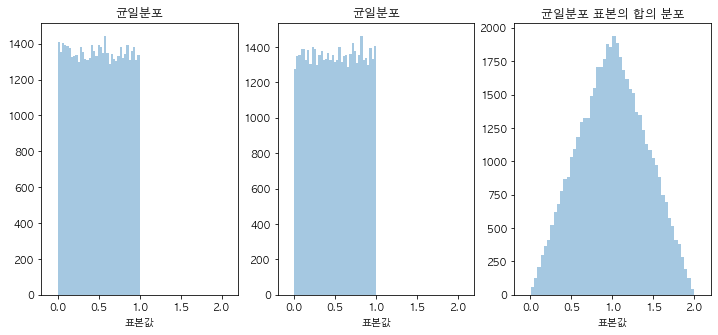

In [37]:
rv1 = sp.stats.uniform()
rv2 = sp.stats.uniform()

np.random.seed(0)
N = 50000
x_1 = rv1.rvs(N)
x_2 = rv2.rvs(N)
x_3 = x_1 + x_2

plt.figure(figsize=(12, 5))

plt.subplot(131)
sns.distplot(x_1, kde=False)
plt.title("균일분포")
plt.xlabel("표본값")
plt.xlim(-0.2, 2.2)

plt.subplot(132)
sns.distplot(x_2, kde=False)
plt.title("균일분포")
plt.xlabel("표본값")
plt.xlim(-0.2, 2.2)

plt.subplot(133)
sns.distplot(x_3, kde=False)
plt.title("균일분포 표본의 합의 분포")
plt.xlabel("표본값")
plt.xlim(-0.2, 2.2)

plt.show()

## 확률 분포 모형

### 베르누이 분포

<class 'scipy.stats._distn_infrastructure.rv_frozen'>



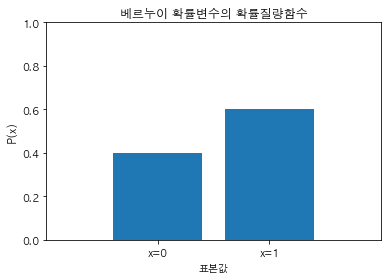

In [11]:
mu = 0.6
rv = sp.stats.bernoulli(mu)
print(type(rv))
print()

xx = [0, 1]
plt.bar(xx, rv.pmf(xx))
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0, 1], ["x=0", "x=1"])
plt.xlabel("표본값")
plt.ylabel("P(x)")
plt.title("베르누이 확률변수의 확률질량함수")
plt.show()

[1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0
 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1]


/Users/adam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


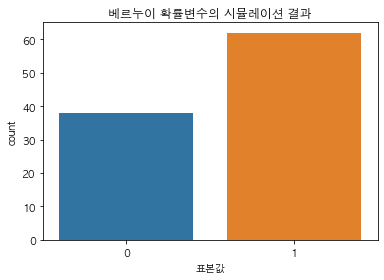

In [12]:
#100개의 샘플 데이터 생성
x = rv.rvs(100, random_state=0)
print(x)
#시각화
sns.countplot(x)
plt.title("베르누이 확률변수의 시뮬레이션 결과")
plt.xlabel("표본값")
plt.show()

    이론  시뮬레이션
0  0.4   0.38
1  0.6   0.62

   표본값     유형    비율
0    0     이론  0.40
1    0  시뮬레이션  0.38
2    1     이론  0.60
3    1  시뮬레이션  0.62



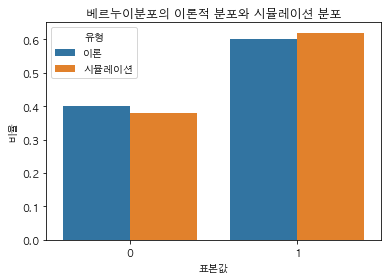

In [13]:
y = np.bincount(x, minlength=2) / float(len(x))

df = pd.DataFrame({"이론": rv.pmf(xx), "시뮬레이션": y})
df.index = [0, 1]
print(df)
print()

df2 = df.stack().reset_index()
df2.columns = ["표본값", "유형", "비율"]
print(df2)
print()

sns.barplot(x="표본값", y="비율", hue="유형", data=df2)
plt.title("베르누이분포의 이론적 분포와 시뮬레이션 분포")
plt.show()

In [14]:
s = sp.stats.describe(x)
print(type(s))
for v in s:
    print(v)

<class 'scipy.stats.stats.DescribeResult'>
100
(0, 1)
0.62
0.23797979797979804
-0.4944513860581973
-1.755517826825128


### 이항분포

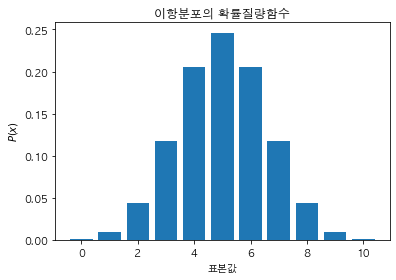

In [15]:
N = 10
mu = 0.5
rv = sp.stats.binom(N, mu)
xx = np.arange(N + 1)
plt.bar(xx, rv.pmf(xx), align="center")
plt.xlabel("표본값")
plt.ylabel("$P(x)$")
plt.title("이항분포의 확률질량함수")
plt.show()

[5 6 5 5 5 6 5 7 8 5 6 5 5 7 3 3 2 7 6 7 8 6 5 6 3 6 3 7 5 5 4 6 5 5 2 5 5
 5 7 6 4 5 6 3 6 6 4 3 4 4 5 5 8 3 4 3 6 4 5 4 3 3 6 3 4 4 6 3 7 3 8 5 8 5
 6 2 4 3 4 3 4 5 3 6 5 4 5 3 5 7 4 6 3 6 4 4 5 2 7 1]


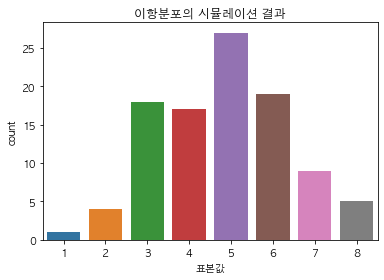

In [23]:
#샘플 데이터 추출
np.random.seed(0)
x = rv.rvs(100)
print(x)

sns.countplot(x=x)
plt.title("이항분포의 시뮬레이션 결과")
plt.xlabel("표본값")
plt.show()


In [24]:
y = np.bincount(x, minlength=N+1)/float(len(x))
df = pd.DataFrame({"이론": rv.pmf(xx), "시뮬레이션": y}).stack()
df = df.reset_index()
df.columns = ["표본값", "유형", "비율"]
df.pivot("표본값", "유형", "비율")
print(df)

    표본값     유형         비율
0     0     이론  9.766e-04
1     0  시뮬레이션  0.000e+00
2     1     이론  9.766e-03
3     1  시뮬레이션  1.000e-02
4     2     이론  4.395e-02
5     2  시뮬레이션  4.000e-02
6     3     이론  1.172e-01
7     3  시뮬레이션  1.800e-01
8     4     이론  2.051e-01
9     4  시뮬레이션  1.700e-01
10    5     이론  2.461e-01
11    5  시뮬레이션  2.700e-01
12    6     이론  2.051e-01
13    6  시뮬레이션  1.900e-01
14    7     이론  1.172e-01
15    7  시뮬레이션  9.000e-02
16    8     이론  4.395e-02
17    8  시뮬레이션  5.000e-02
18    9     이론  9.766e-03
19    9  시뮬레이션  0.000e+00
20   10     이론  9.766e-04
21   10  시뮬레이션  0.000e+00


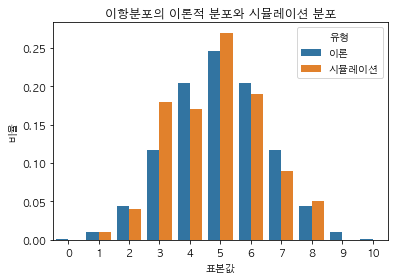

In [25]:
sns.barplot(x="표본값", y="비율", hue="유형", data=df)
plt.title("이항분포의 이론적 분포와 시뮬레이션 분포")
plt.show()

### 카테고리 분포

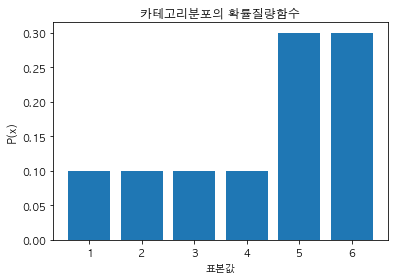

In [26]:
mu = [0.1, 0.1, 0.1, 0.1, 0.3, 0.3]
rv = sp.stats.multinomial(1, mu)
xx = np.arange(1, 7)
xx_ohe = pd.get_dummies(xx)

plt.bar(xx, rv.pmf(xx_ohe.values))
plt.ylabel("P(x)")
plt.xlabel("표본값")
plt.title("카테고리분포의 확률질량함수")
plt.show()

In [27]:
np.random.seed(1)
X = rv.rvs(100)
X[:10]

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0]])

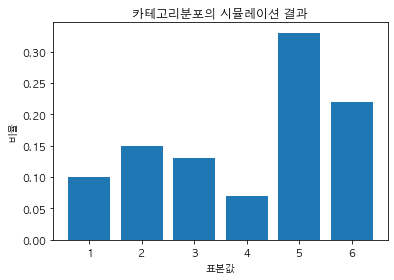

In [29]:
y = X.sum(axis=0) / float(len(X))
plt.bar(np.arange(1, 7), y)
plt.title("카테고리분포의 시뮬레이션 결과")
plt.xlabel("표본값")
plt.ylabel("비율")
plt.show()

In [30]:
df = pd.DataFrame({"이론": rv.pmf(xx_ohe.values), "시뮬레이션": y},
                  index=np.arange(1, 7)).stack()
df = df.reset_index()
df.columns = ["표본값", "유형", "비율"]
df.pivot("표본값", "유형", "비율")
print(df)

    표본값     유형    비율
0     1     이론  0.10
1     1  시뮬레이션  0.10
2     2     이론  0.10
3     2  시뮬레이션  0.15
4     3     이론  0.10
5     3  시뮬레이션  0.13
6     4     이론  0.10
7     4  시뮬레이션  0.07
8     5     이론  0.30
9     5  시뮬레이션  0.33
10    6     이론  0.30
11    6  시뮬레이션  0.22


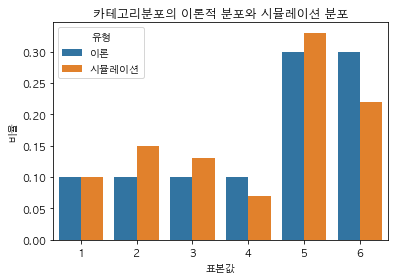

In [31]:
sns.barplot(x="표본값", y="비율", hue="유형", data=df)
plt.title("카테고리분포의 이론적 분포와 시뮬레이션 분포")
plt.show()

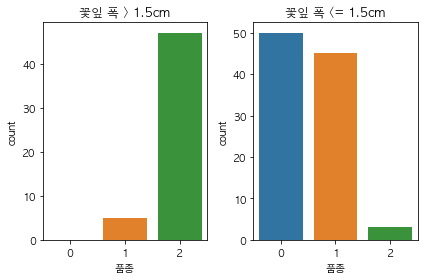

In [38]:
#붓꽃 데이터의 품종값을 시각화

#0, 1, 2 세 가지의 범줏값을 가지는 붓꽃 데이터의 품종값은 카테고리 及 = 3 인 카테고리분포를 이룸
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["품종"] = pd.Series(iris.target, dtype="category")

df1 = df[df["petal width (cm)"] > 1.5]
df2 = df[df["petal width (cm)"] <= 1.5]

fig, ax = plt.subplots(1, 2)
sns.countplot(x="품종", data=df1, ax=ax[0]).set_title("꽃잎 폭 > 1.5cm")
sns.countplot(x="품종", data=df2, ax=ax[1]).set_title("꽃잎 폭 <= 1.5cm")
plt.tight_layout()
plt.show()

### 다항 분포의 시뮬레이션

In [39]:
N = 30
mu = [0.1, 0.1, 0.1, 0.1, 0.3, 0.3]
rv = sp.stats.multinomial(N, mu)

np.random.seed(0)
X = rv.rvs(100)
X[:10]

array([[ 3,  4,  3,  3,  8,  9],
       [ 3,  3,  5,  6,  6,  7],
       [ 4,  3,  3,  5,  5, 10],
       [ 1,  0,  5,  5, 12,  7],
       [ 7,  4,  2,  3,  5,  9],
       [ 3,  1,  6,  3,  8,  9],
       [ 2,  4,  3,  3,  5, 13],
       [ 3,  3,  3,  6,  8,  7],
       [ 2,  3,  4,  1, 11,  9],
       [ 4,  2,  1,  2, 10, 11]])

/Users/adam/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 47.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/adam/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 44.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/adam/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 43.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/adam/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 39.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/adam/opt/anaconda3/lib/python3.9/site-packages/seabor

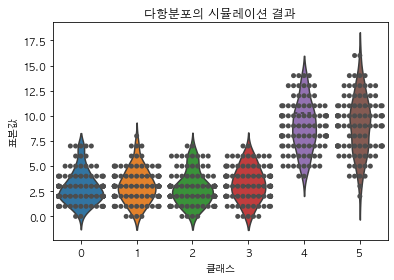

In [40]:
df = pd.DataFrame(X).stack().reset_index()
df.columns = ["시도", "클래스", "표본값"]

sns.violinplot(x="클래스", y="표본값", data=df, inner="quartile")
sns.swarmplot(x="클래스", y="표본값", data=df, color=".3")
plt.title("다항분포의 시뮬레이션 결과")
plt.show()

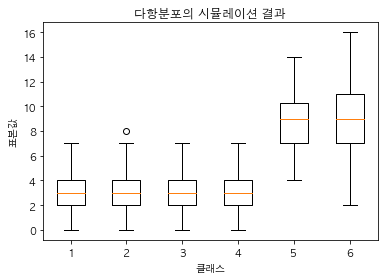

In [41]:
plt.boxplot(X)
plt.title("다항분포의 시뮬레이션 결과")
plt.xlabel("클래스")
plt.ylabel("표본값")
plt.show()

### 정규 분포

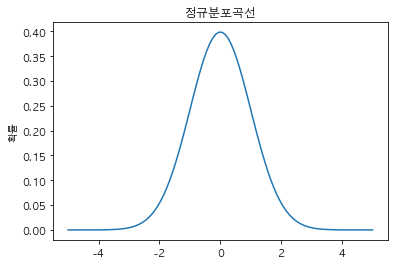

[-0.986 -1.472  1.648  0.164  0.567 -0.223 -0.353 -1.616 -0.292 -0.761
  0.858  1.141  1.467  0.853 -0.599 -1.116  0.767  0.356 -1.769  0.355
  0.815  0.059 -0.185 -0.808 -1.447  0.8   -0.309 -0.233  1.733  0.685
  0.371  0.142  1.52   1.72   0.93   0.582 -2.095  0.124 -0.13   0.094
  0.943 -2.74  -0.569  0.27  -0.467 -1.417  0.869  0.277 -0.971  0.315
  0.822  0.005  0.801  0.078 -0.395 -1.159 -0.086  0.194  0.876 -0.115
  0.457 -0.965 -0.783 -0.11  -1.055  0.82   0.463  0.279  0.339  2.021
 -0.469 -2.201  0.199 -0.051 -0.518 -0.979 -0.439  0.181 -0.503  2.412
 -0.961 -0.793 -2.289  0.251 -2.016 -0.539 -0.276 -0.71   1.739  0.994
  1.319 -0.882  1.129  0.496  0.771  1.029 -0.909 -0.424  0.863 -2.656]


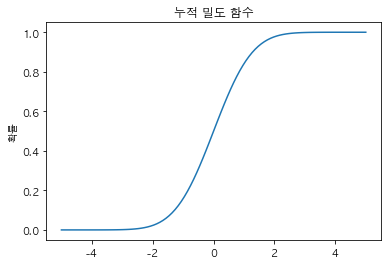

In [42]:
mu = 0
std = 1
rv = sp.stats.norm(mu, std) #평균이 0이고 표준편차가 1인 정규분포 객체 생성 
xx = np.linspace(-5, 5, 100)
plt.plot(xx, rv.pdf(xx)) #확률 밀도 함수를 적용해서 그래프를 생성
plt.ylabel("확률")
plt.title("정규분포곡선")
plt.show()
x = rv.rvs(100) #랜덤한 샘플 100개 만들기
print(x)

#cdf 함수는 이산확률 변수와 연속확률 변수의 누적분포함수의 역할 
#표본 값을 입력하면 해당 표본 값에 대한 누적확률을 출력
plt.plot(xx, rv.cdf(xx)) #누적 확률 밀도 함수를 적용해서 그래프를 생성
plt.ylabel("확률")
plt.title("누적 밀도 함수")
plt.show()

               High      Low     Open    Close    Volume  Adj Close
Date                                                               
2019-01-02  51200.0  48200.0  51100.0  48500.0  271228.0  42302.836
2019-01-03  49150.0  47900.0  49150.0  48350.0  178992.0  42172.000
2019-01-04  49450.0  47950.0  47950.0  49250.0  166264.0  42957.000
2019-01-07  50700.0  49600.0  49650.0  50300.0  118533.0  43872.836
2019-01-08  50600.0  49650.0  50500.0  49900.0  112218.0  43523.949
...             ...      ...      ...      ...       ...        ...
2019-12-23  52900.0  52100.0  52700.0  52900.0  120521.0  46140.621
2019-12-24  53600.0  52900.0  52900.0  53200.0  135485.0  46402.285
2019-12-26  53700.0  52600.0  53600.0  53200.0  155293.0  46402.285
2019-12-27  52400.0  51300.0  51800.0  52200.0  151951.0  47216.359
2019-12-30  52500.0  51200.0  52500.0  51600.0  106523.0  46673.641

[246 rows x 6 columns]


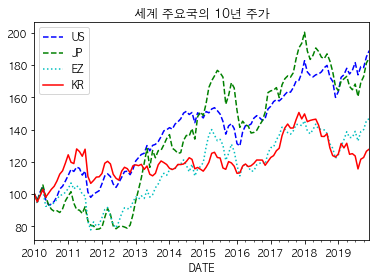

In [43]:
import pandas_datareader.data as web
import datetime

#yahoo에서 gs의 주가 가져오기
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2019, 12, 31)

gs = web.DataReader("078930.KS", "yahoo", start, end)
print(gs)

#미국, 일본, 유럽, 한국 주가지수 가져와서 그래프 그리기
symbols=[
    'SPASTT01USM661N',
    'SPASTT01JPM661N',
    'SPASTT01EZM661N',
    'SPASTT01KRM661N'
]
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(
    sym, data_source="fred", start="2010-01-01", end="2019-12-31")[sym]
    
data.columns =['US', 'JP', 'EZ', 'KR']
data = data/data.iloc[0] *100
styles = ['b--', 'g--', 'c:', 'r-']
data.plot(style=styles)
plt.title('세계 주요국의 10년 주가')
plt.show() 


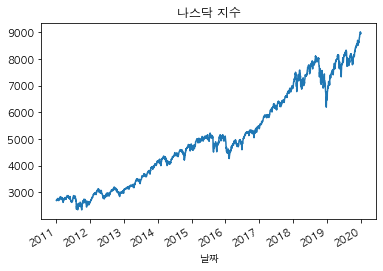

In [44]:
#nasdaq 지수 가져오기
symbol = "NASDAQCOM"
data = pd.DataFrame()
data[symbol] = web.DataReader(
    symbol, data_source="fred", start="2011-01-01", end="2019-12-31")[symbol]

data = data.dropna()
data.plot(legend=False)
plt.xlabel("날짜")
plt.title("나스닥 지수")
plt.show()


In [45]:
#일차별 차이값 구하기
daily_returns = data.pct_change().dropna()
#평균과 
mean = daily_returns.mean().values[0]
std = daily_returns.std().values[0]
print("평균 일간수익률: {:3.2f}%".format(mean * 100))
print("평균 일간변동성: {:3.2f}%".format(std * 100))


평균 일간수익률: 0.06%
평균 일간변동성: 1.05%


/Users/adam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


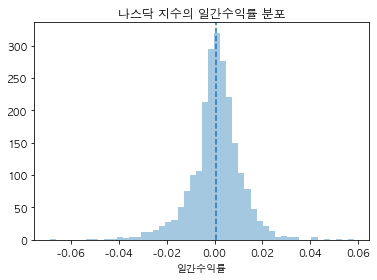

In [46]:
sns.distplot(daily_returns, kde=False)
ymin, ymax = plt.ylim()
plt.vlines(x=mean, ymin=0, ymax=ymax, ls="--")
plt.ylim(0, ymax)
plt.title("나스닥 지수의 일간수익률 분포")
plt.xlabel("일간수익률")
plt.show()

### 로그 정규 분포

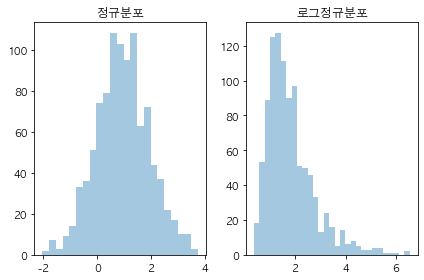

In [47]:
np.random.seed(0)
mu = 1
rv = sp.stats.norm(loc=mu)
x1 = rv.rvs(1000)
s = 0.5
x2 = np.exp(s * x1)

fig, ax = plt.subplots(1, 2)
sns.distplot(x1, kde=False, ax=ax[0])
ax[0].set_title("정규분포")
sns.distplot(x2, kde=False, ax=ax[1])
ax[1].set_title("로그정규분포")
plt.tight_layout()
plt.show()

### Q-Q Plot

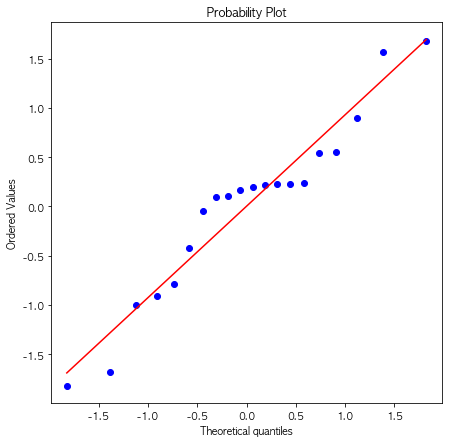

In [48]:
mu = 0
std = 1
rv = sp.stats.norm(mu, std) #평균이 0이고 표준편차가 1인 정규분포 객체 생성 
x = rv.rvs(20)

plt.figure(figsize=(7, 7))
sp.stats.probplot(x, plot=plt)
plt.axis("equal")
plt.show()

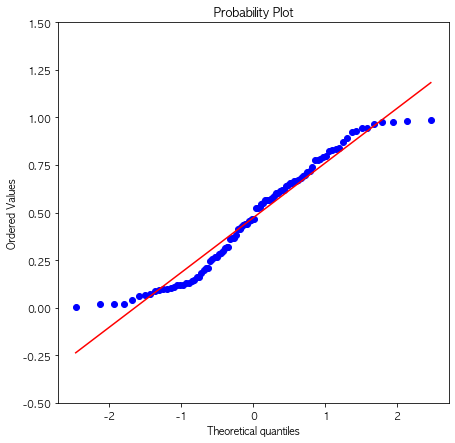

In [49]:
np.random.seed(0)
x = np.random.rand(100)
plt.figure(figsize=(7, 7))
sp.stats.probplot(x, plot=plt)
plt.ylim(-0.5, 1.5)
plt.show()

### 중심 극한 정리

/Users/adam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/adam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/adam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

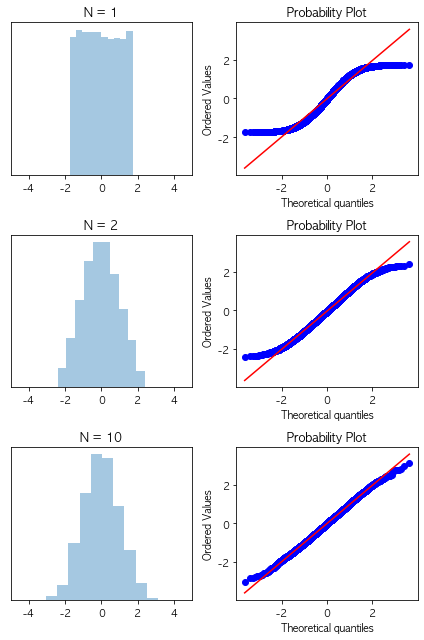

In [50]:
np.random.seed(0)
xx = np.linspace(-2, 2, 100)
plt.figure(figsize=(6, 9))
for i, N in enumerate([1, 2, 10]):
    X = np.random.rand(5000, N)
    Xbar = (X.mean(axis=1) - 0.5) * np.sqrt(12 * N)
    ax = plt.subplot(3, 2, 2 * i + 1)
    sns.distplot(Xbar, bins=10, kde=False, norm_hist=True)
    plt.xlim(-5, 5)
    plt.yticks([])
    ax.set_title("N = {0}".format(N))
    plt.subplot(3, 2, 2 * i + 2)
    sp.stats.probplot(Xbar, plot=plt)
plt.tight_layout()
plt.show()

### 균일 분포

/Users/adam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


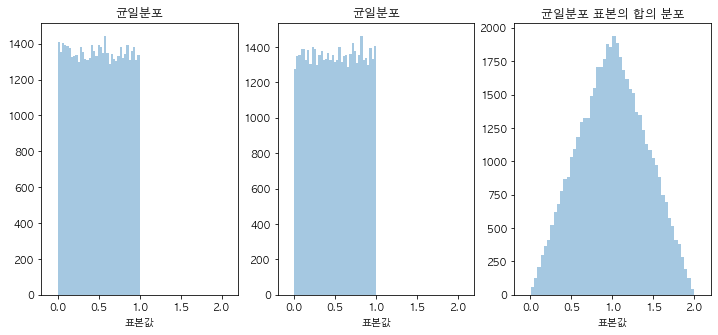

In [51]:
rv1 = sp.stats.uniform()
rv2 = sp.stats.uniform()

np.random.seed(0)
N = 50000
x_1 = rv1.rvs(N)
x_2 = rv2.rvs(N)
x_3 = x_1 + x_2

plt.figure(figsize=(12, 5))

plt.subplot(131)
sns.distplot(x_1, kde=False)
plt.title("균일분포")
plt.xlabel("표본값")
plt.xlim(-0.2, 2.2)

plt.subplot(132)
sns.distplot(x_2, kde=False)
plt.title("균일분포")
plt.xlabel("표본값")
plt.xlim(-0.2, 2.2)

plt.subplot(133)
sns.distplot(x_3, kde=False)
plt.title("균일분포 표본의 합의 분포")
plt.xlabel("표본값")
plt.xlim(-0.2, 2.2)

plt.show()


### 스튜던트 t 분포

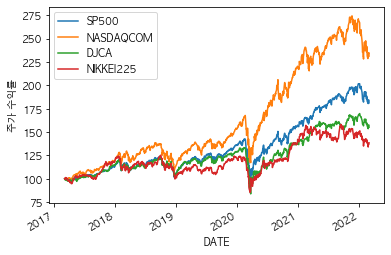

In [52]:
import pandas_datareader.data as web

#S&P 500, 나스닥(Nasdaq), 다우존스(Dow-Jones), 니케이255(Nikkei255) 
symbols = ['SP500', 'NASDAQCOM', 'DJCA', 'NIKKEI225']
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='fred')[sym]
data = data.dropna()
(data / data.iloc[0] * 100).plot()

plt.ylabel("날짜")
plt.ylabel("주가 수익률")
plt.show()

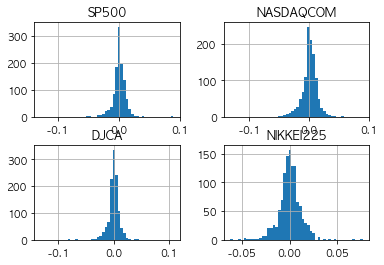

In [53]:
log_returns = np.log(data / data.shift(1))
log_returns.hist(bins=50)
plt.show()

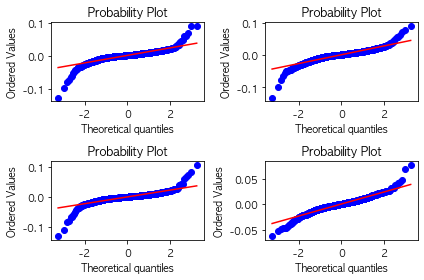

In [54]:
for i, sym in enumerate(symbols):
    ax = plt.subplot(2, 2, i+1)
    sp.stats.probplot(log_returns[sym].dropna(), plot=ax)
plt.tight_layout()
plt.show()

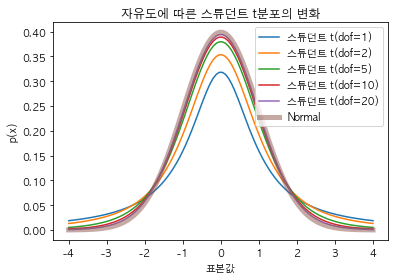

In [55]:
xx = np.linspace(-4, 4, 100)
for df in [1, 2, 5, 10, 20]:
    rv = sp.stats.t(df=df)
    plt.plot(xx, rv.pdf(xx), label=("스튜던트 t(dof=%d)" % df))
plt.plot(xx, sp.stats.norm().pdf(xx), label="Normal", lw=5, alpha=0.5)
plt.title("자유도에 따른 스튜던트 t분포의 변화")
plt.xlabel("표본값")
plt.ylabel("p(x)")
plt.legend()
plt.show()

/Users/adam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/adam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


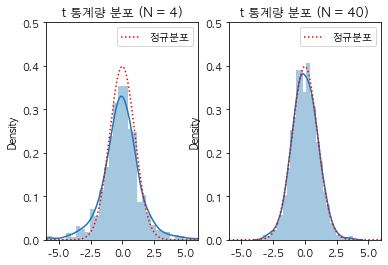

In [56]:
np.random.seed(0)
rv = sp.stats.norm()
M = 1000
plt.subplot(1, 2, 1)
N = 4
x1 = rv.rvs((N, M))
xbar1 = x1.mean(axis=0)
xstd1 = x1.std(axis=0, ddof=1)
x = xbar1 / (xstd1 / np.sqrt(N))
sns.distplot(x, kde=True)
xx = np.linspace(-6, 6, 1000)

plt.plot(xx, rv.pdf(xx), 'r:', label="정규분포")
plt.xlim(-6, 6)
plt.ylim(0, 0.5)
plt.title("t 통계량 분포 (N = 4)")
plt.legend()

plt.subplot(1, 2, 2)
N = 40
x2 = rv.rvs((N, M))
xbar2 = x2.mean(axis=0)
xstd2 = x2.std(axis=0, ddof=1)
x = xbar2 / (xstd2 / np.sqrt(N))
sns.distplot(x, kde=True)
xx = np.linspace(-6, 6, 1000)
plt.plot(xx, rv.pdf(xx), 'r:', label="정규분포")
plt.xlim(-6, 6)
plt.ylim(0, 0.5)
plt.title("t 통계량 분포 (N = 40)")
plt.legend()

### 카이제곱 분포

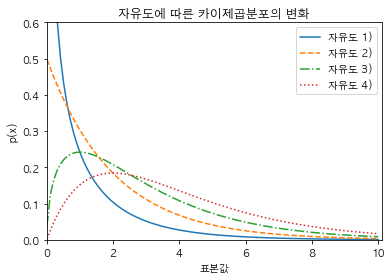

In [57]:
xx = np.linspace(0.01, 10, 100)
dfs = np.arange(1, 5)
lss = ["-", "--", "-.", ":"]
for df, ls in zip(dfs, lss):
    rv = sp.stats.chi2(df=df)
    plt.plot(xx, rv.pdf(xx), ls=ls, label=("자유도 %d)" % df))
plt.xlim(0, 10.1)
plt.ylim(0, 0.6)
plt.title("자유도에 따른 카이제곱분포의 변화")
plt.xlabel("표본값")
plt.ylabel("p(x)")
plt.legend()
plt.show()

/Users/adam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


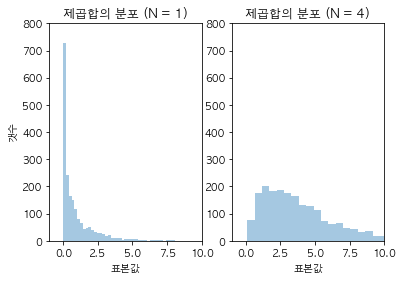

In [58]:
np.random.seed(0)

rv = sp.stats.norm()
M = 2000

plt.subplot(1, 2, 1)
N = 1
x = rv.rvs((N, M))
t = (x ** 2).sum(axis=0)
sns.distplot(t, kde=False)
plt.xlim(-1, 10)
plt.ylim(0, 800)
plt.title("제곱합의 분포 (N = 1)")
plt.xlabel("표본값")
plt.ylabel("갯수")

plt.subplot(1, 2, 2)
N = 4
x = rv.rvs((N, M))
t = (x ** 2).sum(axis=0)
sns.distplot(t, kde=False)
plt.xlim(-1, 10)
plt.ylim(0, 800)
plt.title("제곱합의 분포 (N = 4)")
plt.xlabel("표본값")

plt.show()


### F 분포

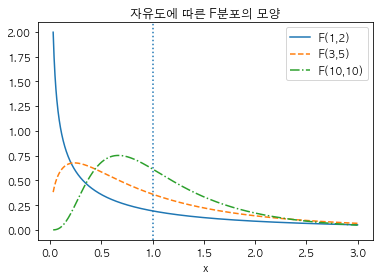

In [59]:
xx = np.linspace(0.03, 3, 1000)
plt.plot(xx, sp.stats.f(1, 2).pdf(xx), ls="-", label="F(1,2)")
plt.plot(xx, sp.stats.f(3, 5).pdf(xx), ls="--", label="F(3,5)")
plt.plot(xx, sp.stats.f(10, 10).pdf(xx), ls="-.", label="F(10,10)")
plt.axvline(1, ls=":")
plt.xlabel("x")
plt.title("자유도에 따른 F분포의 모양")
plt.legend()
plt.show()

/Users/adam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


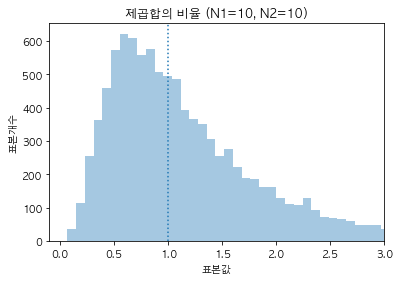

In [60]:
np.random.seed(0)

rv = sp.stats.norm()
M = 10000

N1 = 10
x1 = rv.rvs((N1, M))
t1 = (x1 ** 2).sum(axis=0)

N2 = 10
x2 = rv.rvs((N2, M))
t2 = (x2 ** 2).sum(axis=0)
t = t2 / t1

sns.distplot(t, bins=200, kde=False)
plt.axvline(1, ls=":");
plt.xlim(-0.1, 3)
plt.title("제곱합의 비율 (N1=10, N2=10)")
plt.xlabel("표본값")
plt.ylabel("표본개수")
plt.show()

### 푸아송 분포

[Text(0.5, 0, '푸아송 분포'), Text(0, 0.5, '빈도 수')]

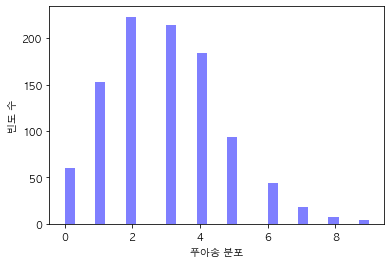

In [62]:
data_poisson = sp.stats.poisson.rvs(mu=3, size=1000)

ax = sns.distplot(data_poisson,
                 bins=30,
                 color='blue',
                 kde=False,
                 hist_kws={'linewidth':1, 'alpha':0.5})
ax.set(xlabel='푸아송 분포', ylabel='빈도 수')

### 지수 분포

Text(0.5, 1.0, 'Exponential Distribution')

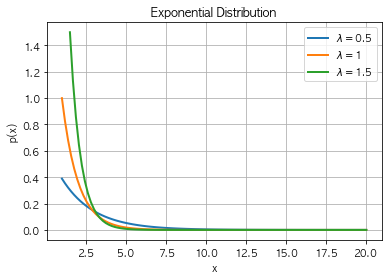

In [65]:
pdp = []
loc = 0.5
scale = 1./0.5
pd = sp.stats.expon(loc=loc, scale=scale)
x = np.linspace(1, 20, 100)
for num in x:
    pdp.append(pd.pdf(num))
plt.plot(x, pdp, linewidth=2.0, label=r'$\lambda =$0.5')
 
pdp = []
loc = 1
scale = 1./1
pd = sp.stats.expon(loc=loc, scale=scale)
x = np.linspace(1, 20, 100)
for num in x:
    pdp.append(pd.pdf(num))
plt.plot(x, pdp, linewidth=2.0, label=r'$\lambda =$1')

pdp = []
loc = 1.5
scale = 1./1.5
pd = sp.stats.expon(loc=loc, scale=scale)
x = np.linspace(1.5, 20, 100)
for num in x:
    pdp.append(pd.pdf(num))
plt.plot(x, pdp, linewidth=2.0, label=r'$\lambda =$1.5')

plt.grid(True)
plt.legend()
plt.ylabel('p(x)')
plt.xlabel('x')
plt.title('Exponential Distribution')

### 감마 분포

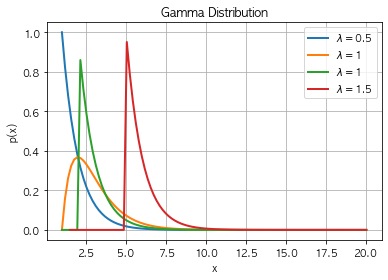

In [68]:
pdp = []
loc = 1
pd = sp.stats.gamma(a=1, loc=loc)
x = np.linspace(1, 20, 100)
for num in x:
    pdp.append(pd.pdf(num))
plt.plot(x, pdp, linewidth=2.0, label=r'$\lambda =$0.5')

pdp = []
loc = 1
pd = sp.stats.gamma(a=2, loc=loc)
x = np.linspace(1, 20, 100)
for num in x:
    pdp.append(pd.pdf(num))
plt.plot(x, pdp, linewidth=2.0, label=r'$\lambda =$1')
 
pdp = []
loc = 2
pd = sp.stats.gamma(a=1, loc=loc)
x = np.linspace(1, 20, 100)
for num in x:
    pdp.append(pd.pdf(num))
plt.plot(x, pdp, linewidth=2.0, label=r'$\lambda =$1')

pdp = []
loc = 5
pd = sp.stats.gamma(a=1, loc=loc)
x = np.linspace(1.5, 20, 100)
for num in x:
    pdp.append(pd.pdf(num))
plt.plot(x, pdp, linewidth=2.0, label=r'$\lambda =$1.5')
 
plt.grid(True)
plt.legend()
plt.ylabel('p(x)')
plt.xlabel('x')
plt.title('Gamma Distribution')
plt.show()

### 베이불 분포

In [81]:
sample = sp.stats.weibull_min.rvs(1.5, scale = 5000, size = 100)
print(sample)

[  622.339  5107.422  2925.943  1809.933  1887.438  3773.53   2525.059
  2097.728  5366.275  4159.222  3939.111  3999.985  1705.475 12705.027
  5371.128  3212.976  2075.184  5071.852   545.055  8618.483  2346.731
  8079.275  1909.066  4390.371  2749.717  3421.653  6520.087  1103.974
  4766.304  1125.924 12059.285  6166.024  3190.053 12030.111   637.31
  2670.432  2884.151  2211.629  9049.241   563.193  3267.687 13349.79
  2221.515  6624.163  2795.398   877.804  1194.876  2612.545  4157.19
  1421.326  2808.924  9136.359  5641.396  4420.413  3720.9    2746.276
  2455.098  3078.743  3168.323  4269.598  4717.476  3869.187  5782.688
  4209.255  4477.233  1985.572  5469.232  1887.259   305.005  7108.877
  2849.873   649.74   2262.981  2343.845  1333.653  1805.799  9338.031
  2911.25   7636.21   4678.681  4139.656  5222.11   1468.501  8498.314
  4934.856  2959.277  8347.187   396.173  9715.085  2282.115  3367.249
  3777.348  1601.197   798.223  1440.603  4334.823  1231.1    3565.41
  2432.789

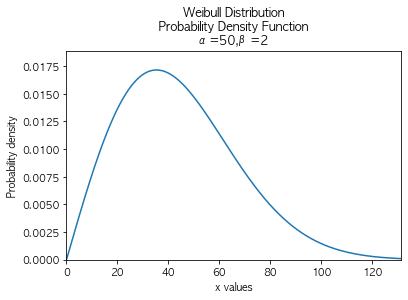

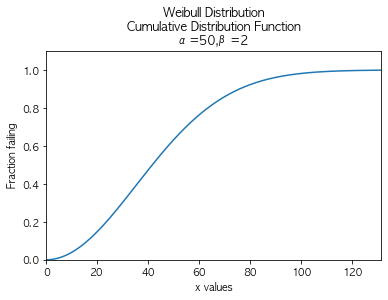

In [75]:
from reliability.Distributions import Weibull_Distribution

#scale 은 50, shape는 2 
dist = Weibull_Distribution(alpha=50, beta=2)  # this created the distribution object
dist.PDF()  # this creates the plot of the PDF
plt.show()

dist.CDF()
plt.show()